In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SHIBUSDT_30m_1h-pump05_210510_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2021-05-10 11:00:00,0.000014,0.000050,0.000014,0.000030,9.302896e+12,491128.0,4.869129e+12,1.735862e+08,0,...,NaN,1.098192,1.200401,0.523399,NaN,NaN,NaN,0.046799,NaN,0.344828
1,2021-05-10 11:30:00,0.000030,0.000031,0.000026,0.000030,5.971410e+12,239329.0,3.053035e+12,8.780768e+07,0,...,NaN,1.046142,0.167284,0.511275,NaN,NaN,NaN,0.022551,NaN,0.344828
2,2021-05-10 12:00:00,0.000030,0.000035,0.000029,0.000034,5.579170e+12,261619.0,3.093740e+12,1.009603e+08,0,...,NaN,1.244750,0.184776,0.554516,NaN,NaN,NaN,0.109032,NaN,0.344828
3,2021-05-10 12:30:00,0.000034,0.000039,0.000032,0.000033,7.321293e+12,351626.0,3.770251e+12,1.357247e+08,0,...,NaN,1.061731,0.204736,0.514971,NaN,NaN,NaN,0.029941,NaN,0.344828
4,2021-05-10 13:00:00,0.000033,0.000036,0.000032,0.000033,4.226486e+12,222587.0,2.129382e+12,7.176803e+07,0,...,NaN,1.015392,0.128877,0.503819,NaN,NaN,NaN,0.007637,NaN,0.344828


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SHIBUSDT"
start_date = "2021-05-10"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close        volume  num_trades  \
 0      0.000014  0.000050  0.000014  0.000030  9.302896e+12    491128.0   
 1      0.000030  0.000031  0.000026  0.000030  5.971410e+12    239329.0   
 2      0.000030  0.000035  0.000029  0.000034  5.579170e+12    261619.0   
 3      0.000034  0.000039  0.000032  0.000033  7.321293e+12    351626.0   
 4      0.000033  0.000036  0.000032  0.000033  4.226486e+12    222587.0   
 ...         ...       ...       ...       ...           ...         ...   
 65334  0.000019  0.000019  0.000019  0.000019  2.682856e+10     16187.0   
 65335  0.000019  0.000019  0.000019  0.000019  1.354821e+10      9031.0   
 65336  0.000019  0.000019  0.000019  0.000019  1.029799e+10      9866.0   
 65337  0.000019  0.000019  0.000019  0.000019  2.252269e+10     17136.0   
 65338  0.000019  0.000019  0.000019  0.000019  1.575956e+10     10273.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0        4.

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9164


np.float64(0.9164029874606363)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9164
AUC-ROC Score: 0.9708

Overall Metrics:
Accuracy:  0.8869
Precision: 0.9017
Recall:    0.8869
F1-Score:  0.8793

Class 0 Metrics:
Precision: 0.8589
Recall:    0.9980
F1-Score:  0.9232

Class 1 Metrics:
Precision: 0.9933
Recall:    0.6492
F1-Score:  0.7852

Using raw probabilities
Classification threshold: 0.9164
{'accuracy': 0.8868841082581541, 'precision': 0.9017179617085954, 'recall': 0.8868841082581541, 'f1': 0.8792718528307707, 'auc_roc': np.float64(0.9708433724247789), 'optimal_threshold': np.float64(0.9164029874606363), 'precision_0': 0.8588957055214724, 'recall_0': 0.9979633401221996, 'f1_0': 0.9232218558643429, 'precision_1': 0.9933333333333333, 'recall_1': 0.6492374727668845, 'f1_1': 0.7852437417654808}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 3.62% of total SHAP value magnitude
Top 20 features explain 87.27% of total SHAP value magnitude
Ratio (Top/Bottom): 24.08x


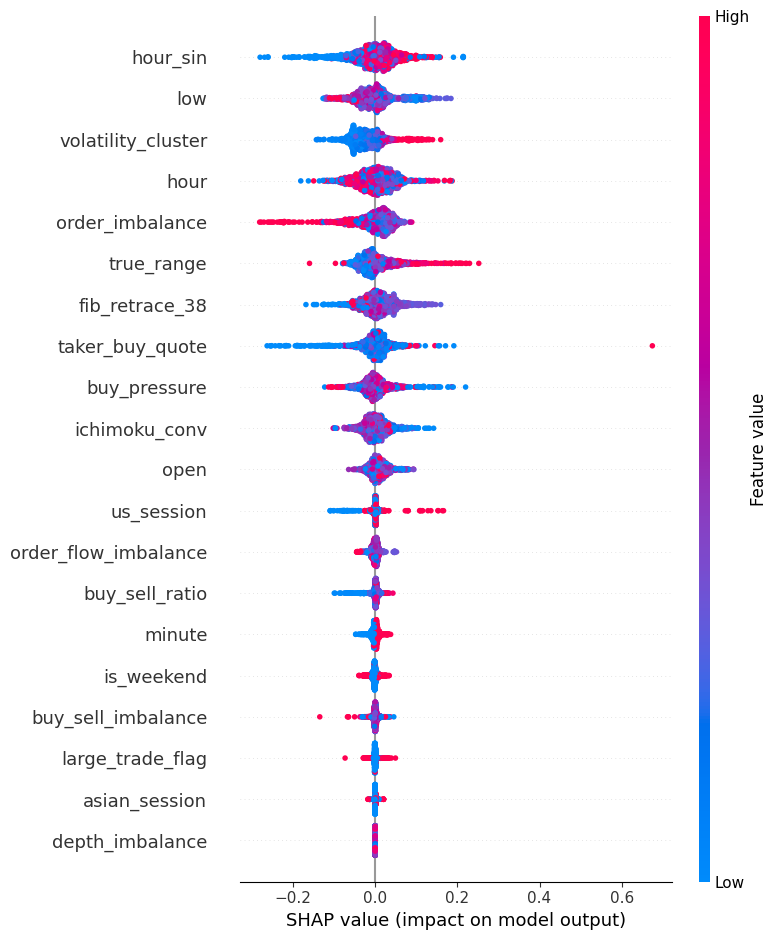


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 9.60% of total importance
Top 20 features explain 71.46% of total importance
Ratio (Top/Bottom): 7.45x


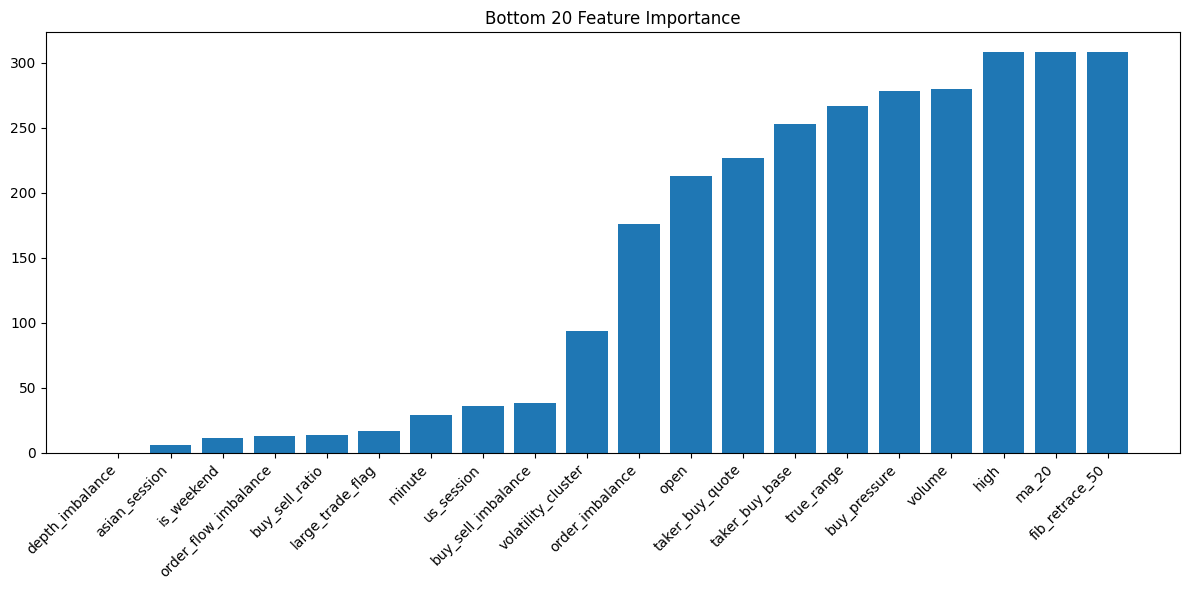

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="30m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()